Rule-Based Classification and Customer Segmentation Assignment

Business Problem

A mobile application company aims to develop new customer profiles by leveraging demographic and usage information. The objective is to segment these customers and estimate the average revenue that new customers can potentially generate for the company.

Dataset

This dataset encompasses purchase transactions made within a mobile application, along with certain demographic details of the users.

Variables

PRICE: The expenditure amount by the user.
PLATFORM: The type of device the user connects from (e.g., Android, iOS).
GENDER: The gender of the user (e.g., Male, Female).
REGION: The country of the user (e.g., USA, FRA, TUR, DEU, etc.).
AGE: The age of the user.

**Task 1: Answer the Following Questions**

In [1]:
#Read the customers.csv file and display general information about the dataset.
import pandas as pd 
import seaborn as sns 
customers=pd.read_csv("customers.csv")
df=customers.copy()
print(df.head())
print(df.info())



   PRICE PLATFORM GENDER REGION  AGE
0     39  android   male    bra   17
1     39  android   male    bra   17
2     49  android   male    bra   17
3     29  android   male    tur   17
4     49  android   male    tur   17
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   PRICE     5000 non-null   int64 
 1   PLATFORM  5000 non-null   object
 2   GENDER    5000 non-null   object
 3   REGION    5000 non-null   object
 4   AGE       5000 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 195.4+ KB
None


In [2]:
#How many unique PLATFORMs exist? What are their frequencies?
print(df["PLATFORM"].nunique())
print(df["PLATFORM"].value_counts())


2
PLATFORM
android    2974
ios        2026
Name: count, dtype: int64


In [3]:
#How many unique PRICE values exist?
df["PRICE"].nunique()

6

In [4]:
#How many sales were made for each PRICE value?
df["PRICE"].value_counts()

PRICE
29    1305
39    1260
49    1031
19     992
59     212
9      200
Name: count, dtype: int64

In [5]:
#How many sales were made from each country?
df["REGION"].value_counts()

REGION
usa    2065
bra    1496
deu     455
tur     451
fra     303
can     230
Name: count, dtype: int64

In [6]:
#What is the total revenue generated from sales in each country?
df.groupby("REGION").agg({"PRICE":"sum"})

,PRICE
REGION,
bra,51354
can,7730
deu,15485
fra,10177
tur,15689
usa,70225


In [7]:
#What are the sales counts according to PLATFORM types?
df.groupby("PLATFORM").agg({"PRICE":"count"})


#df["PLATFORM"].value_counts()

,PRICE
PLATFORM,
android,2974
ios,2026


In [8]:
df.head()

,PRICE,PLATFORM,GENDER,REGION,AGE
0,39,android,male,bra,17
1,39,android,male,bra,17
2,49,android,male,bra,17
3,29,android,male,tur,17
4,49,android,male,tur,17


In [9]:
# What are the average PRICE values for each country?
df.groupby("REGION").agg({"PRICE":"mean"})

,PRICE
REGION,
bra,34.327540
can,33.608696
deu,34.032967
fra,33.587459
tur,34.787140
usa,34.007264


In [10]:
#What are the average PRICE values for each PLATFORM?
df.groupby("PLATFORM").agg({"PRICE":"mean"})

,PRICE
PLATFORM,
android,34.174849
ios,34.069102


In [11]:
#What are the average PRICE values based on the REGION-PLATFORM breakdown?
df.groupby(["PLATFORM","REGION"]).agg({"PRICE":"mean"})

PRICE
PLATFORM REGION           
android  bra     34.387029
         can     33.330709
         deu     33.869888
         fra     34.312500
         tur     36.229437
         usa     33.760357
ios      bra     34.222222
         can     33.951456
         deu     34.268817
         fra     32.776224
         tur     33.272727
         usa     34.371703

<Axes: xlabel='REGION', ylabel='PRICE'>

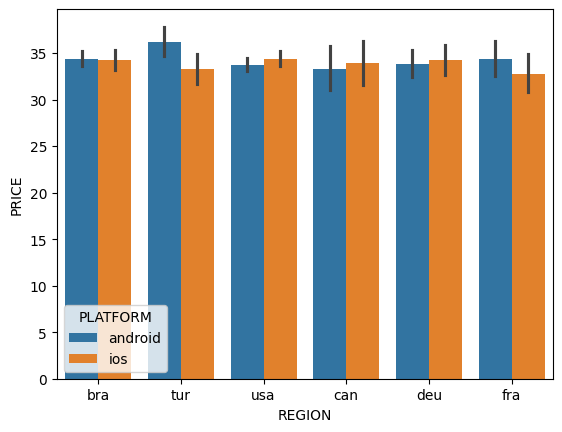

In [12]:
sns.barplot(x="REGION",y="PRICE",hue="PLATFORM",data=df)

In [13]:
#What are the average revenues based on the breakdown of REGION, PLATFORM, GENDER, and AGE?
fr=df.groupby(["REGION","PLATFORM","GENDER","AGE"]).agg({"PRICE":"mean"}).head(200)

In [14]:
#Sort the output in descending order based on PRICE and save the results as agg_df.
agg_df=df.sort_values(by="PRICE",ascending=False)
agg_df.head()

,PRICE,PLATFORM,GENDER,REGION,AGE
4984,59,ios,male,usa,27
1311,59,android,male,bra,20
34,59,android,female,bra,19
1332,59,ios,male,usa,15
1236,59,android,male,bra,40


In [15]:
#Define the index names as variables. (Hint: Use reset_index()).
agg_df=agg_df.reset_index()

In [16]:
agg_df.head()

,index,PRICE,PLATFORM,GENDER,REGION,AGE
0,4984,59,ios,male,usa,27
1,1311,59,android,male,bra,20
2,34,59,android,female,bra,19
3,1332,59,ios,male,usa,15
4,1236,59,android,male,bra,40


In [17]:
#Convert the AGE variable into a categorical variable and add it to agg_df.
agg_df['AGE_CAT'] = pd.cut(agg_df['AGE'], bins=[0, 18, 23, 30, 40, 70], labels=['0_18', '19_23', '24_30', '31_40', '41_70'], right=True)


In [18]:
agg_df.head()

,index,PRICE,PLATFORM,GENDER,REGION,AGE,AGE_CAT
0,4984,59,ios,male,usa,27,24_30
1,1311,59,android,male,bra,20,19_23
2,34,59,android,female,bra,19,19_23
3,1332,59,ios,male,usa,15,0_18
4,1236,59,android,male,bra,40,31_40


In [19]:
agg_df.head()

,index,PRICE,PLATFORM,GENDER,REGION,AGE,AGE_CAT
0,4984,59,ios,male,usa,27,24_30
1,1311,59,android,male,bra,20,19_23
2,34,59,android,female,bra,19,19_23
3,1332,59,ios,male,usa,15,0_18
4,1236,59,android,male,bra,40,31_40


In [20]:
agg_df["customerprofile"] = agg_df["REGION"].str.upper() + "_" + agg_df["PLATFORM"].str.upper() + "_" + agg_df["GENDER"].str.upper() + "_"+ agg_df["AGE_CAT"].str.upper()
agg_df_unique = agg_df.drop_duplicates(subset="customerprofile")
df2 = agg_df_unique.groupby("customerprofile", as_index=False)["PRICE"].mean()
df2 = df2.sort_values(by="PRICE", ascending=False)

In [21]:
"""Segment the new customers (e.g., USA_ANDROID_MALE_0_18) based on PRICE into 4 segments.

Rename the segments with SEGMENT and add it as a new variable to the agg_df.
Describe the segments (perform a group by to calculate the mean, max, and sum of the prices for each segment)."""


agg_df["SEGMENT"] = pd.cut(agg_df["PRICE"], bins=[8, 22, 35, 47, 59], labels=['9_21', "22_34", '35_47', '47_59'], right=True)
agg_df.groupby("SEGMENT").agg({"PRICE":["mean","sum","max"]})

/var/folders/50/8zx_6x713jv2x3s7tf2tpsqr0000gn/T/ipykernel_84586/3326470081.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_df.groupby("SEGMENT").agg({"PRICE":["mean","sum","max"]})


PRICE           
              mean    sum max
SEGMENT                      
9_21     17.322148  20648  19
22_34    29.000000  37845  29
35_47    39.000000  49140  39
47_59    50.705551  63027  59

In [22]:
"""Classify new customers and predict how much revenue they can generate.

For a 33-year-old Turkish woman using Android: What segment does she belong to, and how much revenue is expected to be generated on average?
For a 35-year-old French woman using iOS: What segment does she belong to, and how much revenue is expected to be generated on average?"""


new_user = "TUR_ANDROID_FEMALE_31_40"
agg_df[agg_df["customerprofile"] == new_user]


,index,PRICE,PLATFORM,GENDER,REGION,AGE,AGE_CAT,customerprofile,SEGMENT
239,3303,49,android,female,tur,32,31_40,TUR_ANDROID_FEMALE_31_40,47_59
260,3301,49,android,female,tur,32,31_40,TUR_ANDROID_FEMALE_31_40,47_59
261,3300,49,android,female,tur,32,31_40,TUR_ANDROID_FEMALE_31_40,47_59
649,4783,49,android,female,tur,31,31_40,TUR_ANDROID_FEMALE_31_40,47_59
650,4779,49,android,female,tur,31,31_40,TUR_ANDROID_FEMALE_31_40,47_59
1743,3299,39,android,female,tur,32,31_40,TUR_ANDROID_FEMALE_31_40,35_47
2393,4782,39,android,female,tur,31,31_40,TUR_ANDROID_FEMALE_31_40,35_47
2394,4781,39,android,female,tur,31,31_40,TUR_ANDROID_FEMALE_31_40,35_47
2395,4780,39,android,female,tur,31,31_40,TUR_ANDROID_FEMALE_31_40,35_47
2624,4784,29,android,female,tur,31,31_40,TUR_ANDROID_FEMALE_31_40,22_34


In [23]:

new_user_1 = "TUR_ANDROID_FEMALE_31_40"
new_user_2 = "FRA_IOS_FEMALE_31_40"

revenue_1 = agg_df[agg_df["customerprofile"] == new_user_1]["PRICE"].mean()
revenue_2 = agg_df[agg_df["customerprofile"] == new_user_2]["PRICE"].mean()

se = agg_df[agg_df["customerprofile"] == new_user_1]["SEGMENT"]

print(f"Expected revenue for {new_user_1}: {revenue_1}")
print(f"Expected revenue for {new_user_2}: {revenue_2}")

Expected revenue for TUR_ANDROID_FEMALE_31_40: 41.72727272727273
Expected revenue for FRA_IOS_FEMALE_31_40: 32.75
